# Pymaceuticals Inc.
---

### Analysis

- Based on the summary statistics, Capomulin and Ramicane are two Drug Regimens that have low variance in the data set, indicating that they would be good to use for further analysis and testing. The amount of variance indicated based on the summary table for Ketapril and Naftisol is relatively high in comparison to the other Drug Regimens, thus indicating that they should not be used further.
- There is a slightly higher percentage of male mice as compared to female mice in the dataset 51% vs. 49% respectively. 
- The final tumor volume (mm3) of Capomulin and Ramicane is lower than that of mice using the drug regimen of Ceftamin and Infubinol as indicated by a low vs. high distribution for the box plot.
- There is a strong correlation coefficient for the relationship between weight (g) and average tumor volume (mm3) as indicated with the correlation coeffecient of approximately 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"Mouse_metadata.csv"
study_results_path = r"Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the above data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice= combined_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_IDnumber = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_IDnumber

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_IDnumber) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_clean= clean_df["Mouse ID"].nunique()
num_of_mice_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary statistics table
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

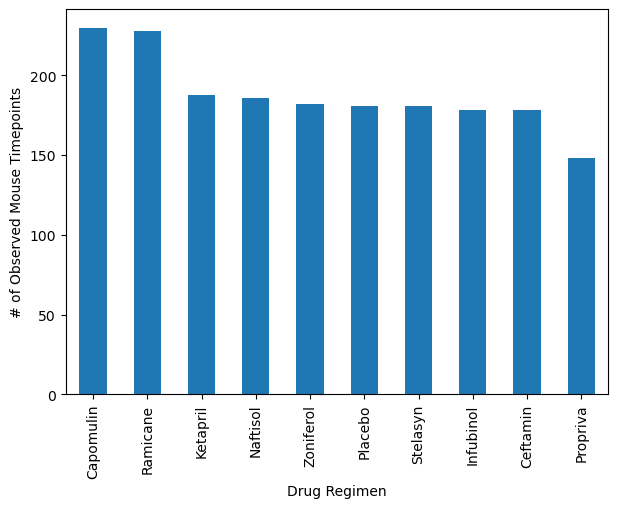

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_number = clean_df["Drug Regimen"].value_counts()

mice_number.plot(kind='bar', x='Drug Regimen', y='# of Observed Mouse Timepoints', legend=False, alpha=1.0, figsize=(7, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

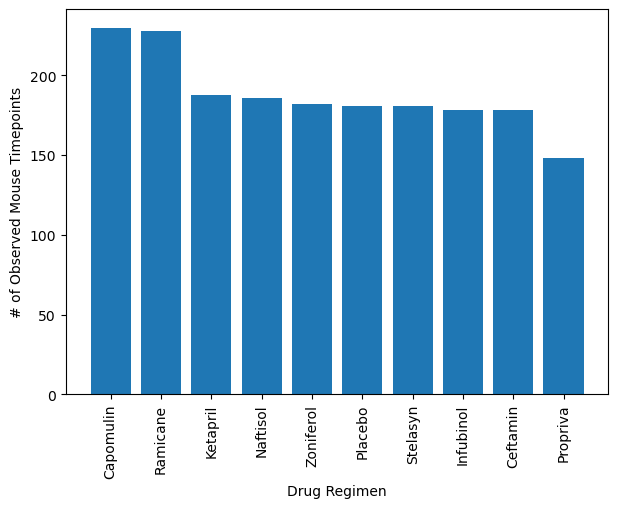

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(7, 5))
plt.bar(mice_number.index.values, mice_number.values, alpha=1.0)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotated x-axis bales to make it easier to read
plt.xticks(rotation=90)

# Displayed the plot
plt.show()

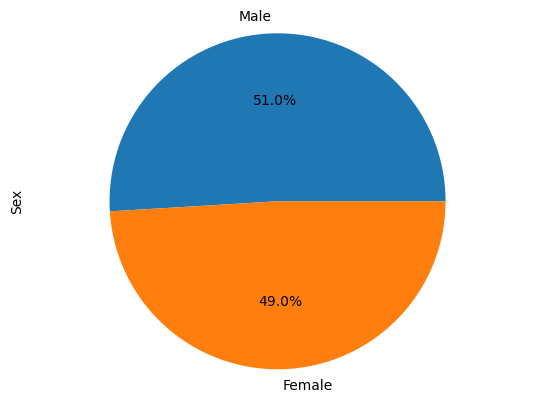

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Determine the number of male vs. female mice
gender_df=clean_df["Sex"].value_counts()

# Create a pie plot using Pandas
gender_df.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal')

# Display the plot
plt.show()


In [11]:
gender_df

Sex
Male      958
Female    922
Name: count, dtype: int64

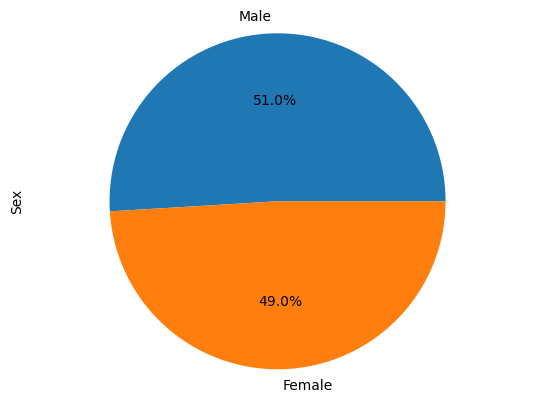

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Create labels
labels = ['Male', 'Female']

# Create a pie plot using pyplot
plt.pie(gender_df, labels=labels, autopct='%1.1f%%')

# Create axes and labels
plt.axis("equal")
plt.ylabel('Sex')


# Display the chart
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
 
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_per_mouse = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(greatest_timepoint_per_mouse, clean_df,  on=['Mouse ID', 'Timepoint'], how='left')


merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#  Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_per_drug = merge_df[merge_df['Drug Regimen'] == drug_regimen]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol.append(tumor_volume_per_drug)
    
    # Calculate IQR
    quartiles = tumor_volume_per_drug.quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = tumor_volume_per_drug[(tumor_volume_per_drug < lower_bound) | (tumor_volume_per_drug > upper_bound)]
    
    print(f"Outliers for {drug_regimen}: {outliers}")

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


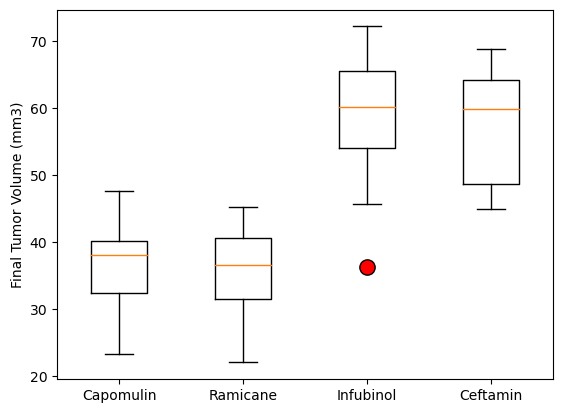

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#change how the outlier presents
flierprops = dict(marker='o', markerfacecolor='red', markersize=11, linestyle='none')

# Plot generation and display
plt.boxplot(tumor_vol, labels=treatment, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

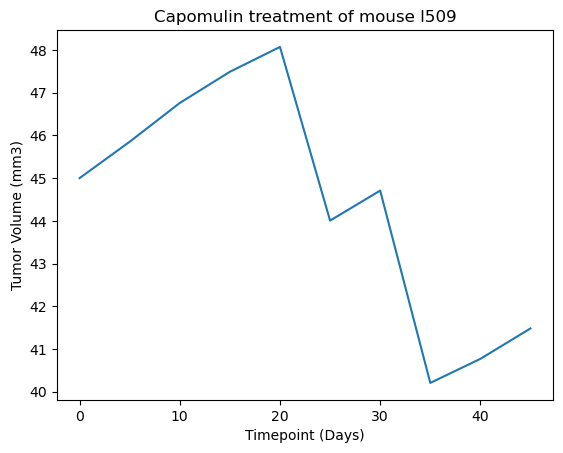

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#identify the specific mouse
mouse_id = 'l509'

#Filter for the particular 'Mouse ID' on Capomulin
selected_mouse = combined_df[combined_df['Mouse ID'] == mouse_id]

#Build the plot
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'])

# Add labels and title
plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

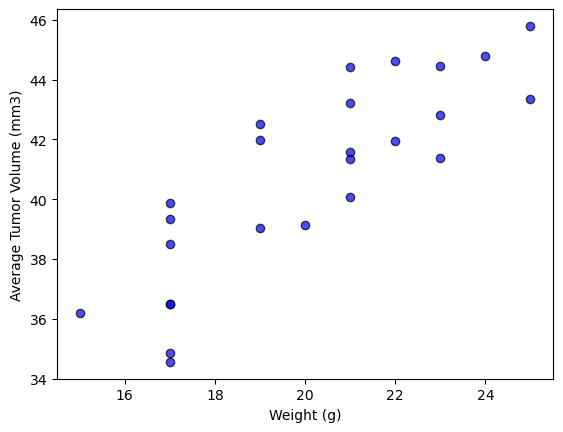

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter out all data for the Capomulin regimen
mice_capomulin_regime = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_vol = mice_capomulin_regime.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with original data
merged_data = pd.merge(average_tumor_vol, mice_capomulin_regime[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

# Create scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', edgecolors='black', alpha=0.7)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()


## Correlation and Regression

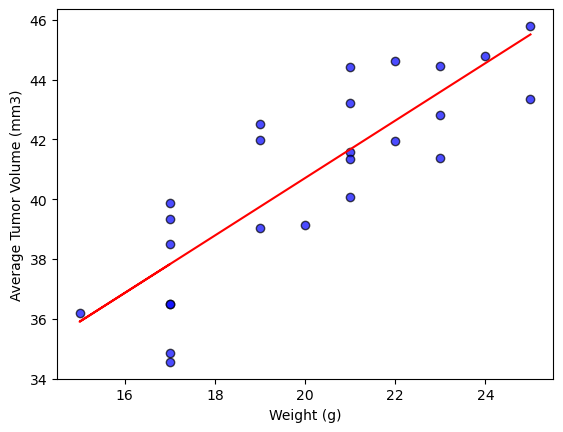

Correlation Coefficient: 0.8419363424694722


In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

#linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mice_capomulin_regime['Weight (g)'], mice_capomulin_regime['Tumor Volume (mm3)'])
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', edgecolors='black', alpha=0.7)
plt.plot(mice_capomulin_regime['Weight (g)'], slope * mice_capomulin_regime['Weight (g)'] + intercept, color='red', linestyle='-', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')